In [178]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# GATHER DATA FROM WEB (kagge.com, city-data.com)

In [179]:
# set path for file
population_file="minoritymajority.csv"

population_file_pd = pd.read_csv(population_file)
population_file_pd.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,18049,Indiana,Fulton County,20737,10369,10368,9985,10020,9561,9627,19188,1549,No,7.47%,170,1%,965,4.65%
1,18051,Indiana,Gibson County,33458,16642,16816,15873,16117,15648,15955,31603,1855,No,5.54%,667,2%,476,1.42%
2,18053,Indiana,Grant County,69330,33282,36048,29587,32460,28353,31398,59751,9579,No,13.82%,4936,7%,2656,3.83%
3,18055,Indiana,Greene County,32940,16479,16461,16179,16167,16029,15999,32028,912,No,2.77%,82,0%,351,1.07%
4,18057,Indiana,Hamilton County,289495,141103,148392,125675,131785,120979,127105,248084,41411,No,14.30%,11332,4%,10548,3.64%


In [180]:
# Check to see which stat3s are in the file (to check if there is California)
state=population_file_pd["STNAME"].unique()
state

array(['Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Alabama', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois'], dtype=object)

In [181]:
# create new data frame which looks for minority in california only
population_california=population_file_pd.loc[population_file_pd["STNAME"]=="California"]
population_california= population_california.rename(columns={"CTYNAME": "CountyName"})

population_california["CountyName"]=population_california["CountyName"].replace(' County', "", regex=True)

# final data frame for population california
population_california = population_california.loc[:, ["CountyName", "TOT_POP", "TOT_MALE", "TOT_FEMALE",
                                              "WA_MALE", "WA_FEMALE", "NHWA_MALE", "NHWA_FEMALE",
                                              "NHWhite_Alone", "Not_NHWhite_Alone", "MinorityMinority", "MinorityPCT",
                                              "Black", "BlackPCT", "Hispanic", "HispanicPCT"]]
print(len(population_california))
population_california.head()

58


,CountyName,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
2605,Alameda,1554720,762520,792200,407938,405572,258244,262785,521029,1033691,Yes,66.49%,198719,13%,352707,22.69%
2606,Alpine,1129,593,536,443,383,414,359,773,356,No,31.53%,5,0%,95,8.41%
2607,Amador,37035,19898,17137,17806,15866,15232,14390,29622,7413,No,20.02%,868,2%,4691,12.67%
2608,Butte,221539,109845,111694,95317,97500,80880,83885,164765,56774,No,25.63%,3816,2%,32875,14.84%
2609,Calaveras,44742,22383,22359,20600,20639,18439,18679,37118,7624,No,17.04%,443,1%,4823,10.78%


In [182]:
# read city homes data
homes_file="city_homes_new.csv"

california_home_file = pd.read_csv(homes_file)

print(len(california_home_file))
print(california_home_file["CountyName"].dtypes)
california_home_file.head()

51
object


,CountyName,Average Median Home Value
0,Alameda,818429.166667
1,Amador,264447.619048
2,Butte,219312.962963
3,Calaveras,242791.666667
4,Contra Costa,738645.138889


In [183]:
# Merge 2 data files
merged_minority_homes = pd.merge(population_california, california_home_file, on='CountyName')
print(len(merged_minority_homes))
merged_minority_homes=pd.DataFrame(merged_minority_homes)
merged_minority_homes.head()

51


,CountyName,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT,Average Median Home Value
0,Alameda,1554720,762520,792200,407938,405572,258244,262785,521029,1033691,Yes,66.49%,198719,13%,352707,22.69%,818429.166667
1,Amador,37035,19898,17137,17806,15866,15232,14390,29622,7413,No,20.02%,868,2%,4691,12.67%,264447.619048
2,Butte,221539,109845,111694,95317,97500,80880,83885,164765,56774,No,25.63%,3816,2%,32875,14.84%,219312.962963
3,Calaveras,44742,22383,22359,20600,20639,18439,18679,37118,7624,No,17.04%,443,1%,4823,10.78%,242791.666667
4,Contra Costa,1079597,526925,552672,364406,372460,247731,258027,505758,573839,Yes,53.15%,104138,10%,267419,24.77%,738645.138889


# GRAPH

In [184]:
# set y for y-axis
y1= merged_minority_homes["HispanicPCT"].str.replace("%", "").astype(float)
y2 = merged_minority_homes["BlackPCT"].str.replace("%", "").astype(float)
y3 = merged_minority_homes["Average Median Home Value"]
#y3

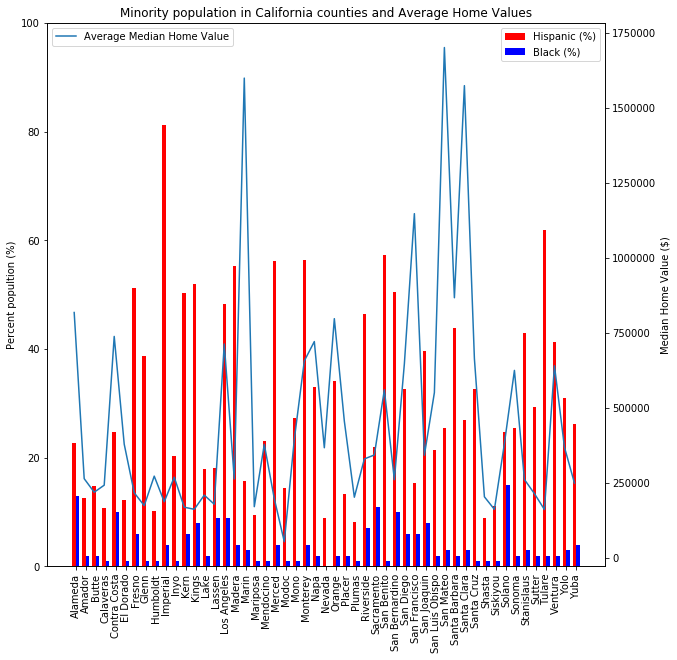

In [197]:
# plot minority populaion and home median value vs counties

N=51
ind = np.arange(N)
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
width=0.35 # width of bars

ax1.bar(ind, y1, width, color="r")
ax1.bar(ind+width, y2, width, color="b")
ax3 = merged_minority_homes["Average Median Home Value"].plot(secondary_y=True)

ax1.set_title('Minority population in California counties and Average Home Values')

ax1.set_xticks(ind+ width/2)
ax1.set_xticklabels((merged_minority_homes["CountyName"]),rotation = 90)

ax1.set_ylim(0,100, auto = True)
ax1.legend(('Hispanic (%)', 'Black (%)'))
plt.legend(loc="upper left")

ax3.set_xlabel('California Counties')
ax1.set_ylabel("Percent popultion (%)")
ax3.set_ylabel("Median Home Value ($)")

plt.show()
plt.savefig("MinorityPopulationInCounties_and_MedianHomeValues.png")

In [198]:
%matplotlib inline
import scipy.stats as stats

p1=stats.pearsonr(y1,y3)[1]
p2=stats.pearsonr(y2,y3)[1]
#p3=stats.pearsonr((y1+y2),y3)[1]

print(f"p-value for %Hispanic population & Median home value: {p1}, --> no correlation.")
print(f"p-value for %Black population & Median home value: {p2}, --> no correlation.")
     

p-value for %Hispanic population & Median home value: 0.5927314329741257, --> no correlation.
p-value for %Black population & Median home value: 0.6564546628142199, --> no correlation.
